In [1]:
import sift

# Create or load parameter file

In [2]:
parameters = sift.parameters(file_path="/home/user/Documents/projects/runs/")
parameters.create_parameter_file()

/home/user/Documents/GitHub/Spectro-Imaging-Forecasting-Tool/pkg/sift/Parameters.py:46: RuntimeWarning: invalid value encountered in divide
  ClTT = DlTT * 2 * np.pi / (ell * (ell + 1.))


# View Differential Intensity Projection

In [2]:
y = 5.4e-05
electron_temperature = 5.0 # KeV
peculiar_vel = 1e-11 # km/s
time = 288000 # Seconds
sides_long = 100
sides_lat = 100

In [3]:
hybrid_band = sift.bands.hybrid()

In [4]:
siftsim = sift.simulation(y, electron_temperature, peculiar_vel, hybrid_band, time)

 Loading CNSN 2012 basis functions (CMB frame). This will only be done once. 


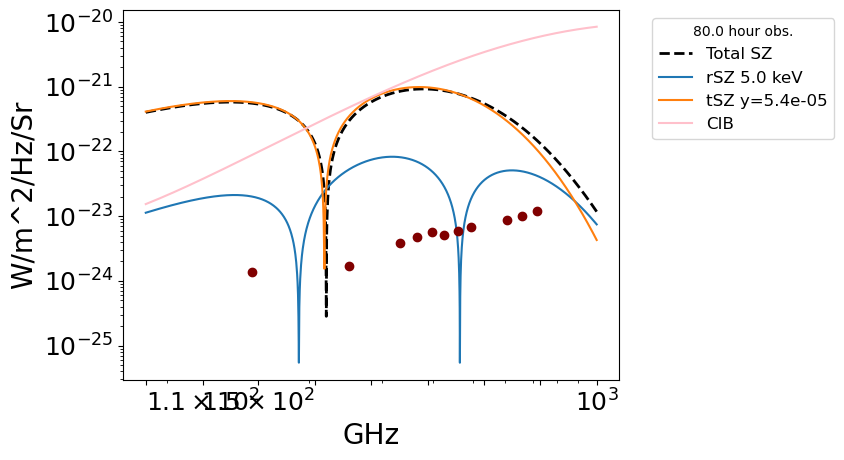

In [5]:
siftsim.differential_intensity_projection()

# Run Script

In [6]:
siftsim.run_sim(parameter_file="/home/user/Documents/projects/runs/parameter_file_100.npy", processors_pool=2, realizations=1)

  1%|▎                                       | 95/12000 [00:11<23:03,  8.60it/s]

emcee: Exception while calling your likelihood function:emcee: Exception while calling your likelihood function:

KeyboardInterrupt: 

# Analyze output

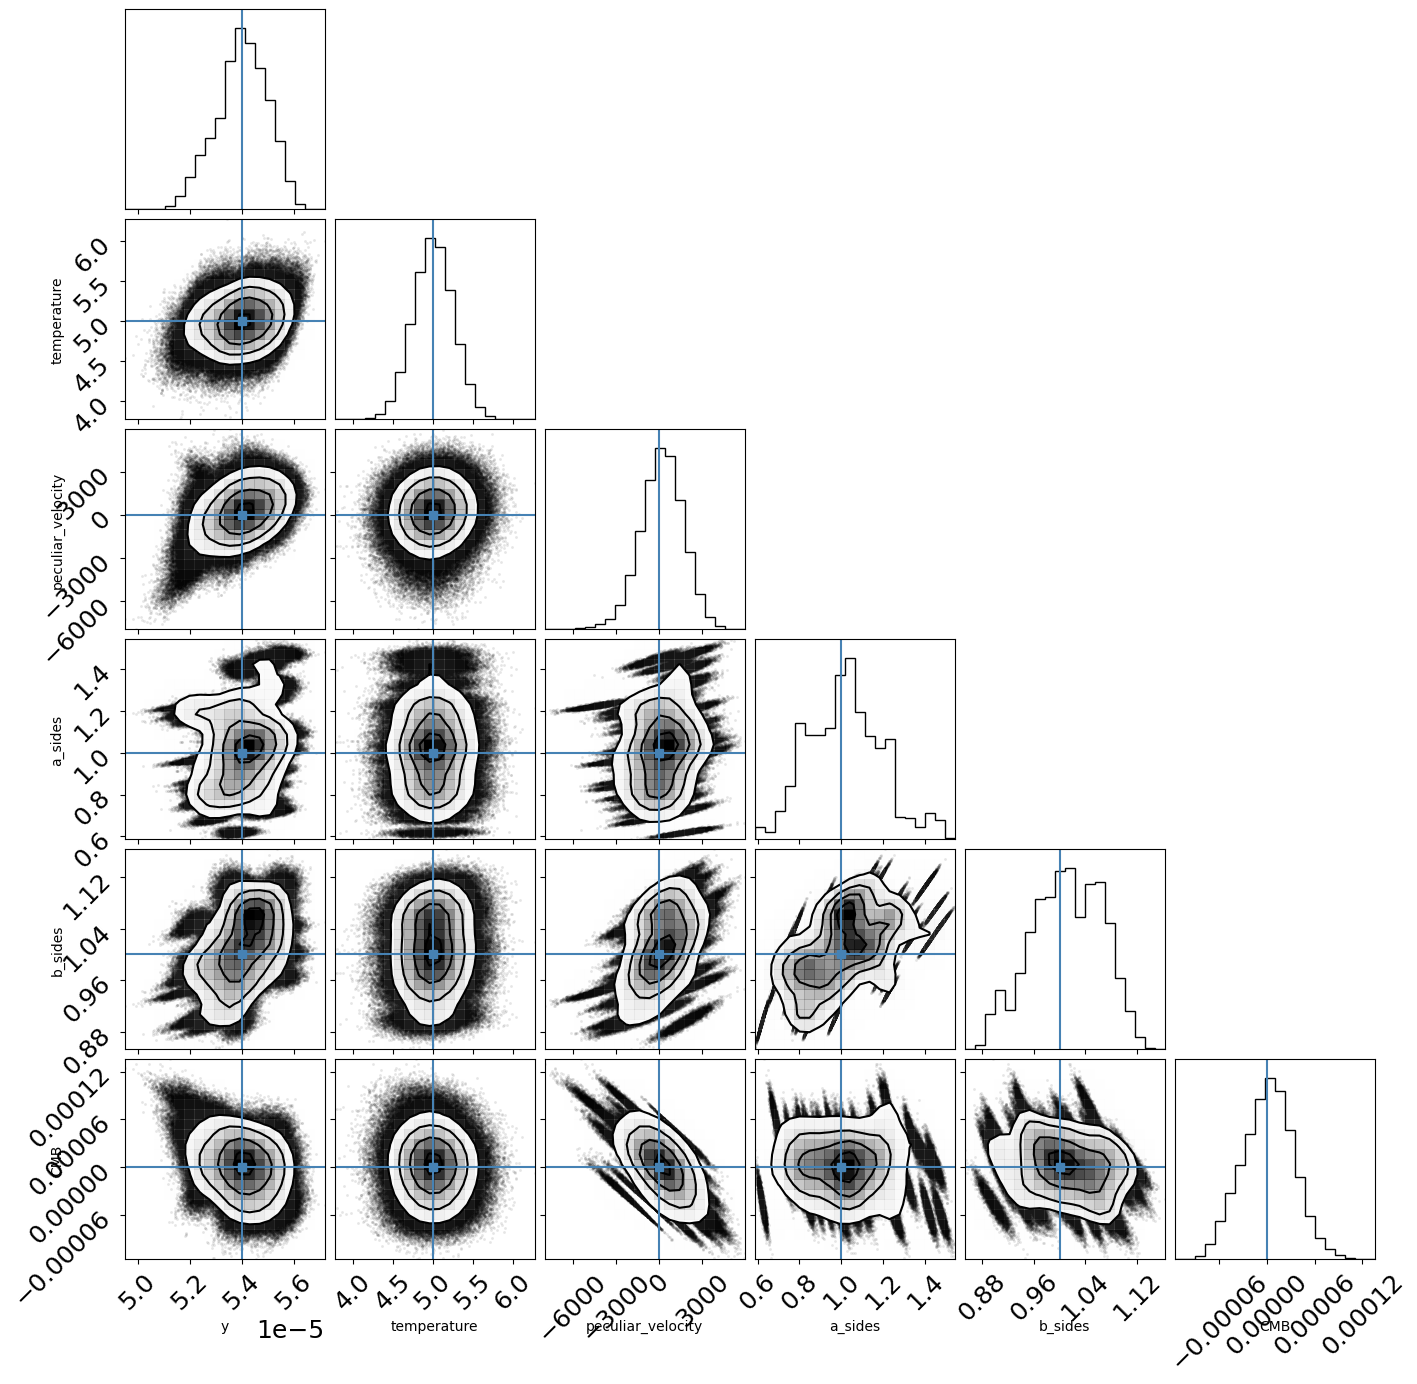

In [8]:
siftproj = sift.projection('/home/user/Documents/projects/runs/')
fig, data = siftproj.contour_plot_projection('run_1.npy')

In [ ]:
proj.chain_projection('run_1.npy')

/data/bolocam/bolocam/erapaport/python/SIFTSenv02/lib64/python3.6/site-packages/pygtc/pygtc.py:1264: UserWarning: No contour levels were found within the data range.
  linewidths=1, colors=colors[k][l])
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


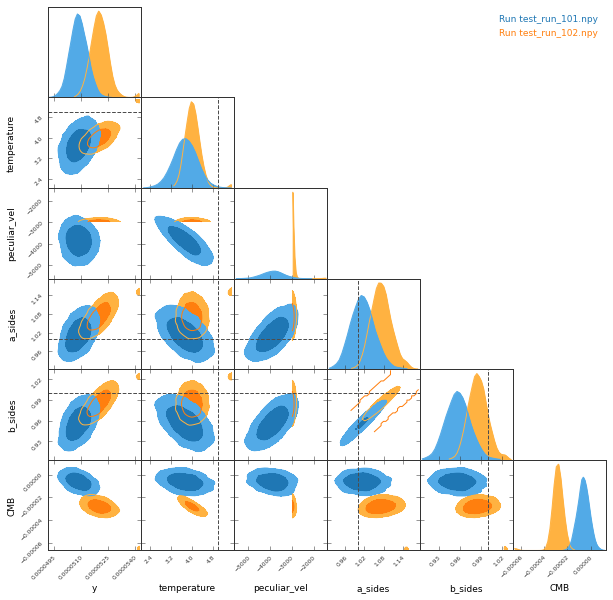

(<Figure size 720x720 with 22 Axes>,
 array([[ 5.11653660e-05,  3.53130320e+00, -3.49316909e+03,
          1.04786962e+00,  9.72401070e-01, -9.06395858e-06],
        [ 5.10121161e-05,  3.82234412e+00, -4.06498779e+03,
          1.02708060e+00,  9.62151501e-01, -3.95546523e-06],
        [ 5.01265126e-05,  3.23034601e+00, -3.63440869e+03,
          9.87663631e-01,  9.44006541e-01, -8.55728656e-07],
        ...,
        [ 5.08677825e-05,  4.13554077e+00, -4.28998340e+03,
          9.84876693e-01,  9.43330190e-01, -7.08131121e-06],
        [ 5.07849779e-05,  4.29262641e+00, -4.37343543e+03,
          9.60709314e-01,  9.32427122e-01, -9.03878312e-06],
        [ 5.07368245e-05,  4.22555492e+00, -4.19333889e+03,
          9.62264595e-01,  9.33211497e-01, -1.12258570e-05]]),
 array([[ 5.22263842e-05,  4.10644453e+00, -2.90663051e+03,
          1.08523811e+00,  9.90875499e-01, -3.04248322e-05],
        [ 5.17931153e-05,  4.24444546e+00, -2.98139083e+03,
          1.03526442e+00,  9.69017691e-01

In [8]:
proj.contour_plot_double_projection('run_1.npy', 'run_2.npy')

In [ ]:
proj.statistics('run_1.npy')